In [1]:
!wget http://cs301.pintoenterprisetech.com/out.csv

--2021-11-10 19:42:15--  http://cs301.pintoenterprisetech.com/out.csv
Resolving cs301.pintoenterprisetech.com (cs301.pintoenterprisetech.com)... 157.245.119.43, 2604:a880:800:10::904:6001
Connecting to cs301.pintoenterprisetech.com (cs301.pintoenterprisetech.com)|157.245.119.43|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78336 (76K) [text/csv]
Saving to: ‘out.csv’

out.csv             100%[===================>]  76.50K   216KB/s    in 0.4s    

2021-11-10 19:42:16 (216 KB/s) - ‘out.csv’ saved [78336/78336]



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("out.csv")

In [18]:
GMEdf = df.drop(['timekey', 'ticker'], axis=1).rename(columns={"timestamp" : "ds", "avg(sentiment)" : "y"})

In [19]:
GMEdf.head()

,ds,y
0,2021-10-31 02:48:20,0.020940
1,2021-10-31 02:51:21,0.339265
2,2021-10-31 03:03:52,0.375158
3,2021-10-31 03:10:07,0.181590
4,2021-10-31 03:20:05,-0.014369


In [ ]:
!pip install prophet

In [13]:
from prophet import Prophet

In [20]:
m = Prophet()
m.fit(GMEdf)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [24]:
future = m.make_future_dataframe(periods=50)
future.tail()

,ds
1585,2021-12-26 19:10:02
1586,2021-12-27 19:10:02
1587,2021-12-28 19:10:02
1588,2021-12-29 19:10:02
1589,2021-12-30 19:10:02


In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1585,2021-12-26 19:10:02,0.512313,-0.824727,1.955514
1586,2021-12-27 19:10:02,0.517460,-0.888107,2.074960
1587,2021-12-28 19:10:02,0.522607,-0.943020,2.106728
1588,2021-12-29 19:10:02,0.527753,-0.996019,2.168987
1589,2021-12-30 19:10:02,0.532900,-1.026284,2.258886


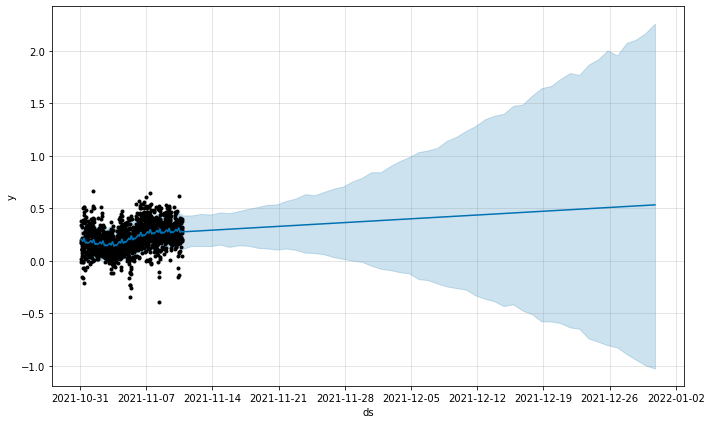

In [26]:
fig1 = m.plot(forecast)

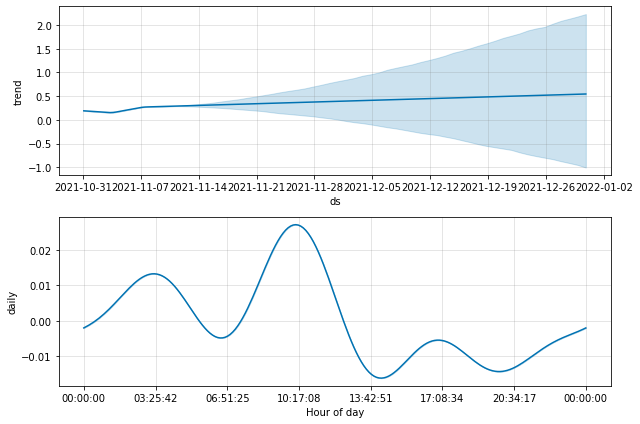

In [27]:
fig2 = m.plot_components(forecast)

In [28]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [29]:
plot_components_plotly(m, forecast)